# Alucar - Analisando as vendas

In [21]:
import pandas as pd

In [22]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


Analisando acima verificamos que são duas colunas, sendo elas: 'mes' = Data (Ano/Mês/Dia), 'vendas' = Quantidade de vendas no mês.

In [23]:
alucar = pd.read_csv('alucar.csv')

Precisamos descobrir se com o passar do tempo a empresa está vendendo mais ou vendendo menos.

In [24]:
print(f'Quantidade de linhas e colunas: {alucar.shape}')

Quantidade de linhas e colunas: (24, 2)


In [25]:
print(f'Quantidade de dados NULOS: {alucar.isna().sum().sum()}')

Quantidade de dados NULOS: 0


In [26]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

Como iremos trabalhar com Time Series, precisamos converter o tipo da coluna 'mes' para o tipo datetime.

In [27]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [28]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [32]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

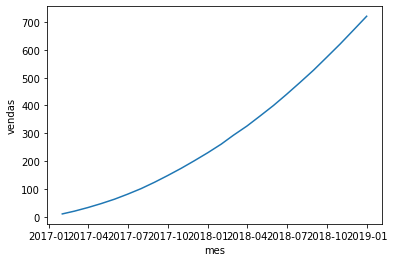

In [33]:
sns.lineplot(x='mes', y='vendas', data=alucar)

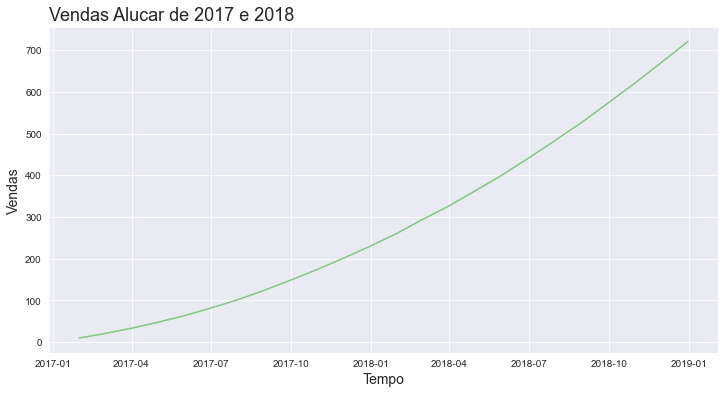

In [40]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas', fontsize=14)
ax = ax

Para descobrir se as vendas estão crescendo mensalmente pegamos a coluna 'vendas' e subtraimos pela linha anterior, sendo assim teremos a diferença mensal das vendas e conseguiremos plotar um gráfico entendendo as vendas mes a mes.

In [42]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


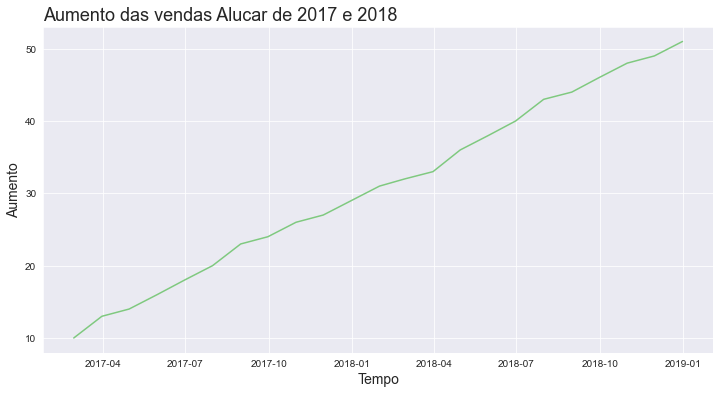

In [44]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [45]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

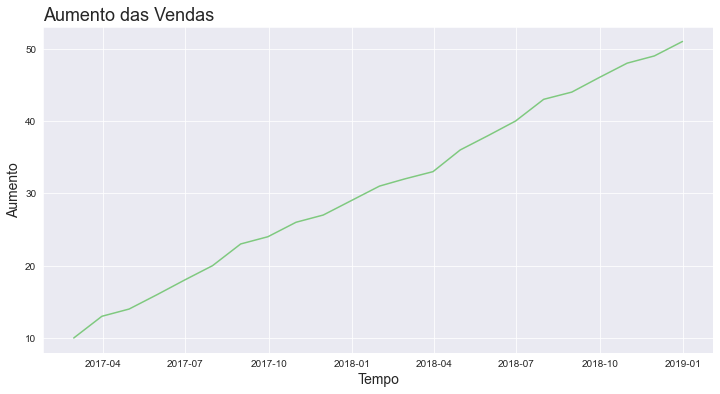

In [46]:
plotar('Aumento das Vendas', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

Agora iremos descobrir a aceleração das vendas, para fazer isso iremos calcular a diferença em uma nova coluna chamada 'aceleracao', nessa coluna faremos o mesmo processo que fizemos em 'mes', porém agora para 'aumento'

In [49]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


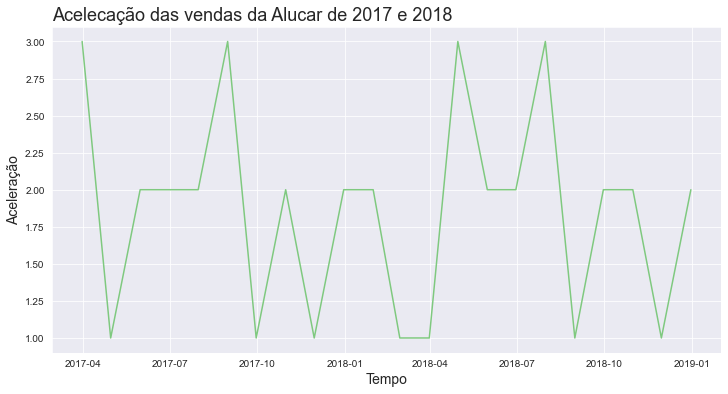

In [50]:
plotar('Acelecação das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

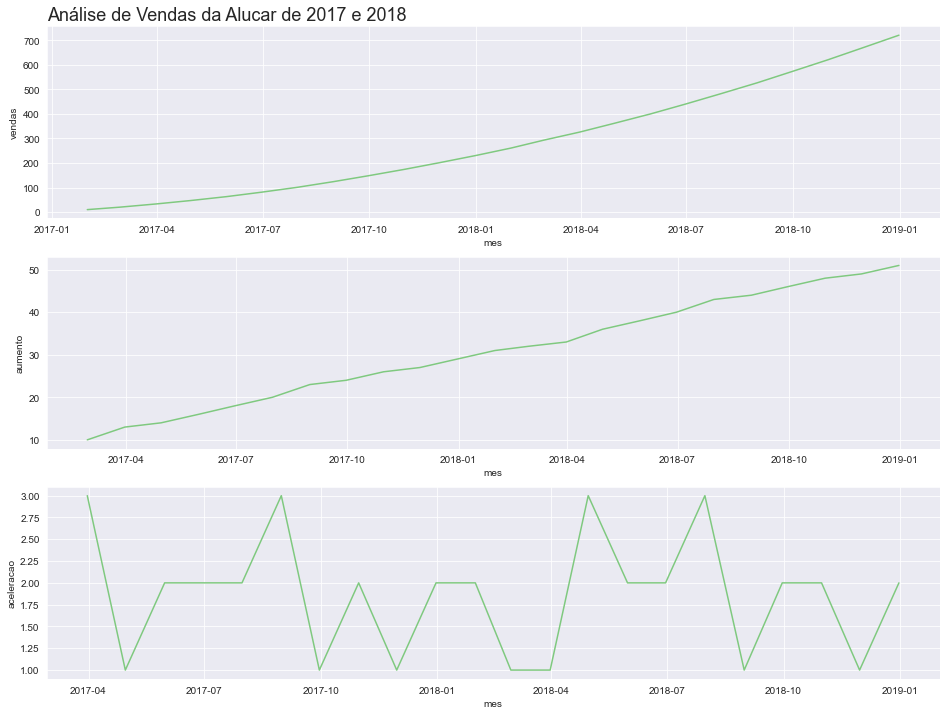

In [57]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de Vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax

In [59]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax
    

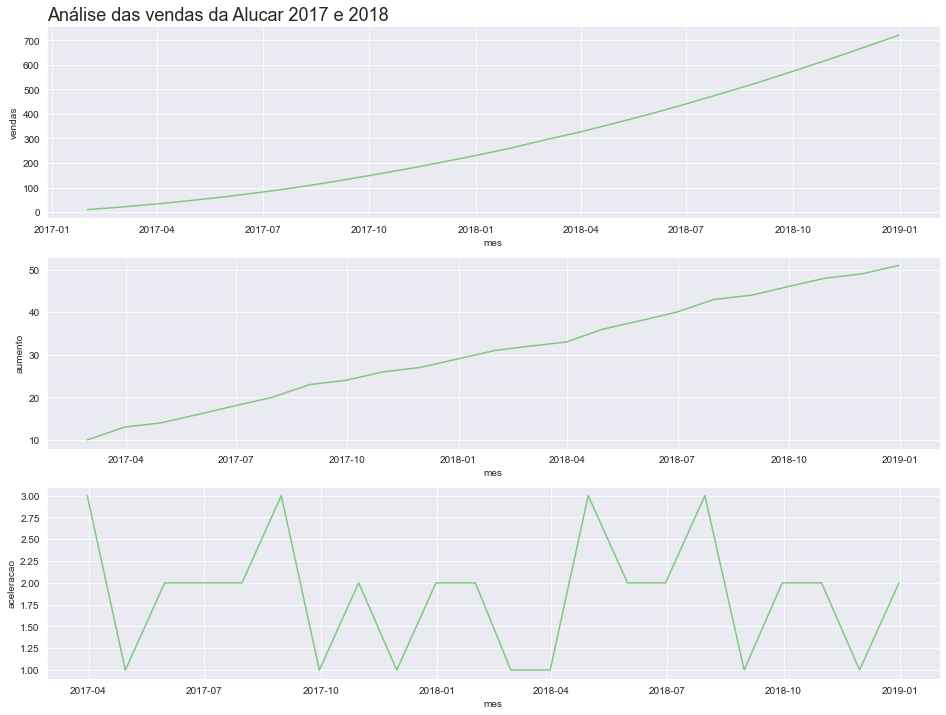

In [60]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise das vendas da Alucar 2017 e 2018')

In [61]:
from pandas.plotting import autocorrelation_plot

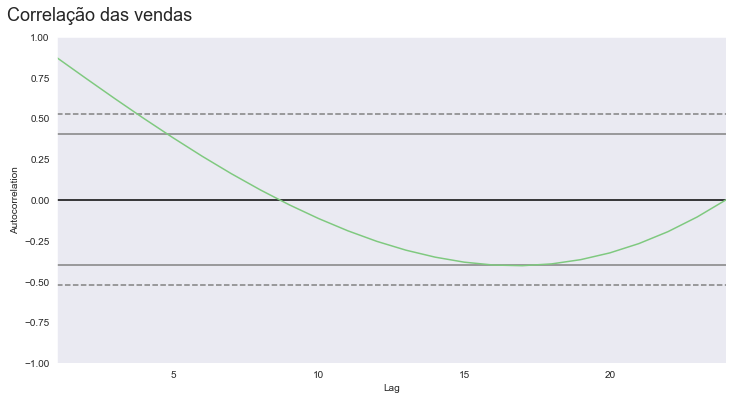

In [76]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.175, y= 0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

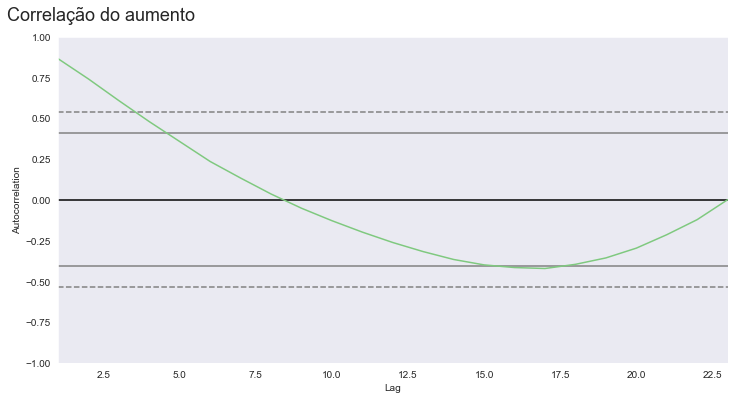

In [81]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.175, y= 0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

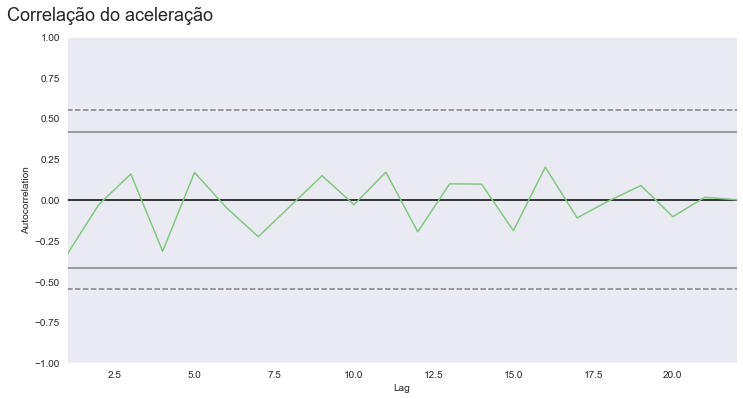

In [83]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aceleração', fontsize=18, x=0.175, y= 0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax